# 04 Logistic Regression and Variants Models

In this notebook, we load the (standard) preprocessed data and train several models based on logistic regression.

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
# Imports
import sys
import os

import numpy as np

from data_loading import load_data
from data_exploration import print_dataset_info
from utils import stratified_split
from models import (
    logistic_regression,
    reg_l2_logistic_regression,
    reg_l1_logistic_regression,
)
from train_pipeline import train_and_test, hyperparameters_grid_search

#### Preprocessed data loading

In [3]:
# Load and preprocessed data (~2 minutes)
data_path = "../data"
x_train, x_test, y_train, train_ids, test_ids, feature_names, feature_dict = load_data(data_path, preprocessed=True)

Loading raw data...
Data loaded.
Preprocessing data...
Data preprocessed.


#### Baseline

In [11]:
# Define hyperparameters
hyperparameters = {
    "initial_w": np.zeros(x_train.shape[1]),
    "max_iters": 2500,
    "gamma": 0.001,
    "lambda_": 0.01,
}

# Split the data
x_train_new, y_train_new, _, x_val, y_val, _ = stratified_split(x_train, y_train, train_ids)

Model specific parameters:
    max_iters: 2500
    gamma: 0.001

Training model...
Training loss: 0.24673504777612265


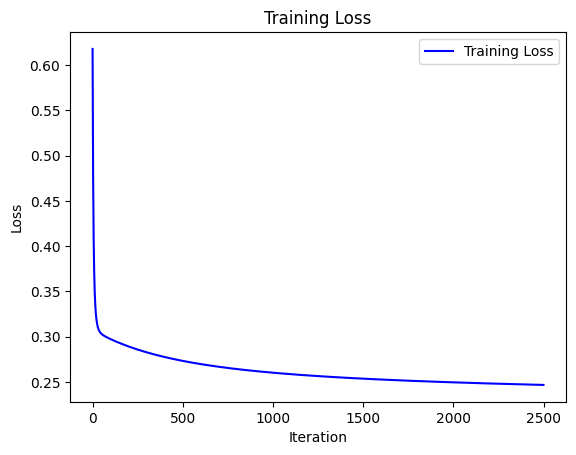

Metrics: Accuracy = 0.912, F1 Score = 0.003
Training and evaluation complete.
Results saved in ../results/logs/logistic_regression_20241029213130


In [12]:
# (~2 minutes)
(w, loss), metrics = train_and_test(
    x_train_new, y_train_new, x_val, y_val, logistic_regression, verbose=True, **hyperparameters
)

#### Logistic Regression
Simple logistic regression with or without class weight (i.e. penalizing more the error of the minority class), grid search for the following parameters :
- class weight
- gamma (learning rate)
- threshold for prediction via sigmoid

In [55]:
# Grid search for hyperparameters
gammas = [0.001, 0.01, 0.1]
thresholds = np.linspace(0.2, 0.8, 15).round(2).tolist()
max_iters = 1500
class_weights=[1,5,10]

hyperparameters_ranges = {
    "initial_w": [np.zeros(x_train.shape[1])],
    "gamma": gammas,
    "threshold": thresholds,
    "max_iters": [max_iters],
    "class_weight": class_weights,
}

In [56]:
best_weights, best_hyperparameters = hyperparameters_grid_search(x_train_new, y_train_new, x_val, y_val, logistic_regression, metrics='f1', verbose=True, **hyperparameters_ranges)

Model: logistic_regression

Results will be saved in ../results/grid_search/logistic_regression_20241030005635

Training with parameters: {'gamma': 0.001, 'max_iters': 1500, 'class_weight': 1}
F1 Score: 0.283 for parameters {'gamma': 0.001, 'max_iters': 1500, 'class_weight': 1} with threshold=0.2
********************
New best F1 Score: 0.283 with parameters {'gamma': 0.001, 'max_iters': 1500, 'class_weight': 1, 'threshold': 0.2}
********************
F1 Score: 0.208 for parameters {'gamma': 0.001, 'max_iters': 1500, 'class_weight': 1} with threshold=0.24
F1 Score: 0.103 for parameters {'gamma': 0.001, 'max_iters': 1500, 'class_weight': 1} with threshold=0.29
F1 Score: 0.047 for parameters {'gamma': 0.001, 'max_iters': 1500, 'class_weight': 1} with threshold=0.33
F1 Score: 0.016 for parameters {'gamma': 0.001, 'max_iters': 1500, 'class_weight': 1} with threshold=0.37
F1 Score: 0.003 for parameters {'gamma': 0.001, 'max_iters': 1500, 'class_weight': 1} with threshold=0.41
F1 Score: 0.000 

/Users/leagoffinet/Documents/Neuro-X/MA3/cs-433/ml-project-1-ml_fs/src/implementations.py:62: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y_ * np.log(pred) + (1 - y_) * np.log(1 - pred))
/Users/leagoffinet/Documents/Neuro-X/MA3/cs-433/ml-project-1-ml_fs/src/implementations.py:62: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y_ * np.log(pred) + (1 - y_) * np.log(1 - pred))


F1 Score: 0.408 for parameters {'gamma': 0.1, 'max_iters': 1500, 'class_weight': 10} with threshold=0.2
F1 Score: 0.405 for parameters {'gamma': 0.1, 'max_iters': 1500, 'class_weight': 10} with threshold=0.24
F1 Score: 0.401 for parameters {'gamma': 0.1, 'max_iters': 1500, 'class_weight': 10} with threshold=0.29
F1 Score: 0.400 for parameters {'gamma': 0.1, 'max_iters': 1500, 'class_weight': 10} with threshold=0.33
F1 Score: 0.396 for parameters {'gamma': 0.1, 'max_iters': 1500, 'class_weight': 10} with threshold=0.37
F1 Score: 0.396 for parameters {'gamma': 0.1, 'max_iters': 1500, 'class_weight': 10} with threshold=0.41
F1 Score: 0.395 for parameters {'gamma': 0.1, 'max_iters': 1500, 'class_weight': 10} with threshold=0.46
F1 Score: 0.393 for parameters {'gamma': 0.1, 'max_iters': 1500, 'class_weight': 10} with threshold=0.5
F1 Score: 0.391 for parameters {'gamma': 0.1, 'max_iters': 1500, 'class_weight': 10} with threshold=0.54
F1 Score: 0.387 for parameters {'gamma': 0.1, 'max_iters'

In [50]:
# Grid search for hyperparameters
gammas = [0.001, 0.01, 0.1]
thresholds = np.linspace(0.2, 0.8, 15).round(2).tolist()
max_iters = 1500
class_weights = [1, 5]
lambdas = [0.001, 0.01, 0.1]

hyperparameters_ranges = {
    "initial_w": [np.zeros(x_train.shape[1])],
    "gamma": gammas,
    "threshold": thresholds,
    "max_iters": [max_iters],
    "lambda_": lambdas,
    "class_weight": class_weights,
}

In [52]:
best_weights, best_hyperparameters = hyperparameters_grid_search(
    x_train_new, y_train_new, x_val, y_val, reg_l2_logistic_regression, metrics="f1", verbose=True, **hyperparameters_ranges
)

Model: reg_l2_logistic_regression

Results will be saved in ../results/grid_search/reg_l2_logistic_regression_20241029232141

Training with parameters: {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1}
F1 Score: 0.283 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} with threshold=0.2
********************
New best F1 Score: 0.283 with parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1, 'threshold': 0.2}
********************
F1 Score: 0.207 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} with threshold=0.24
F1 Score: 0.103 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} with threshold=0.29
F1 Score: 0.046 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} with threshold=0.33
F1 Score: 0.016 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} wi

#### L1-Regularized Logistic Regression
Simple logistic regression with or without class weight (i.e. penalizing more the error of the minority class), grid search for the following parameters :
- class weight
- lambda : penalization
- gamma (learning rate)
- threshold for prediction via sigmoid

In [53]:
# Grid search for hyperparameters
gammas = [0.001, 0.01, 0.1]
thresholds = np.linspace(0.2, 0.8, 15).round(2).tolist()
max_iters = 1500
class_weights = [1, 5]
lambdas = [0.001, 0.01, 0.1]

hyperparameters_ranges = {
    "initial_w": [np.zeros(x_train.shape[1])],
    "gamma": gammas,
    "threshold": thresholds,
    "max_iters": [max_iters],
    "lambda_": lambdas,
    "class_weight": class_weights,
}

In [54]:
best_weights, best_hyperparameters = hyperparameters_grid_search(
    x_train_new,
    y_train_new,
    x_val,
    y_val,
    reg_l1_logistic_regression,
    metrics="f1",
    verbose=True,
    **hyperparameters_ranges
)

Model: reg_l1_logistic_regression

Results will be saved in ../results/grid_search/reg_l1_logistic_regression_20241030000912

Training with parameters: {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1}
F1 Score: 0.278 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} with threshold=0.2
********************
New best F1 Score: 0.278 with parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1, 'threshold': 0.2}
********************
F1 Score: 0.199 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} with threshold=0.24
F1 Score: 0.096 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} with threshold=0.29
F1 Score: 0.041 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} with threshold=0.33
F1 Score: 0.012 for parameters {'gamma': 0.001, 'max_iters': 1500, 'lambda_': 0.001, 'class_weight': 1} wi